In [1]:
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    'C:/Users/iamso/DataspellProjects/virtuka_classification/data/Face Shape 7s/Face Shape/Train',  # This is the source directory for training images
    target_size=(224, 224),  # All images will be resized to 224 x 224
    batch_size=batch_size,
    # Specify the classes explicitly
    classes = ['Diamond','Oblong','Oval','Round','Square','Triangle'],
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical')

Found 3600 images belonging to 6 classes.


In [3]:
# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using testing_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    'C:/Users/iamso/DataspellProjects/virtuka_classification/data/Face Shape 7s/Face Shape/Test',  # This is the source directory for training images
    target_size=(224, 224),  # All images will be resized to 224 x 224
    batch_size=batch_size,
    # Specify the classes explicitly
    classes = ['Diamond','Oblong','Oval','Round','Square','Triangle'],
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical')

Found 1200 images belonging to 6 classes.


In [4]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 224 x 224 with 3 bytes color
        # The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a dense layer
        tf.keras.layers.Flatten(),
        # 128 neuron in the fully-connected layer
        tf.keras.layers.Dense(128, activation='relu'),
        # 5 output neurons for 5 classes with the softmax activation
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
    return model
    


In [5]:
# Get the untrained model
model = create_model()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [46]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nDesired accuracy reached, stop training")
            self.model.stop_training = True

In [47]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[CustomCallback()]
)

Epoch 1/100
112/112 [==============================] - 77s 660ms/step - loss: 1.7874 - accuracy: 0.1858 - val_loss: 1.7519 - val_accuracy: 0.2551
Epoch 2/100
112/112 [==============================] - 72s 638ms/step - loss: 1.6887 - accuracy: 0.2943 - val_loss: 1.6424 - val_accuracy: 0.3361
Epoch 3/100
112/112 [==============================] - 71s 636ms/step - loss: 1.5454 - accuracy: 0.3842 - val_loss: 1.4051 - val_accuracy: 0.4257
Epoch 4/100
112/112 [==============================] - 80s 717ms/step - loss: 1.3908 - accuracy: 0.4577 - val_loss: 1.1947 - val_accuracy: 0.5431
Epoch 5/100
112/112 [==============================] - 71s 636ms/step - loss: 1.1942 - accuracy: 0.5429 - val_loss: 0.9751 - val_accuracy: 0.6410
Epoch 6/100
112/112 [==============================] - 91s 814ms/step - loss: 0.9777 - accuracy: 0.6401 - val_loss: 0.8385 - val_accuracy: 0.6791
Epoch 7/100
112/112 [==============================] - 76s 675ms/step - loss: 0.8029 - accuracy: 0.7038 - val_loss: 0.7330 -

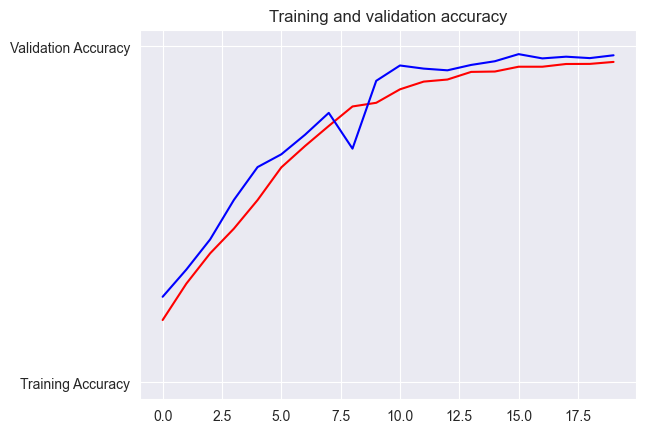

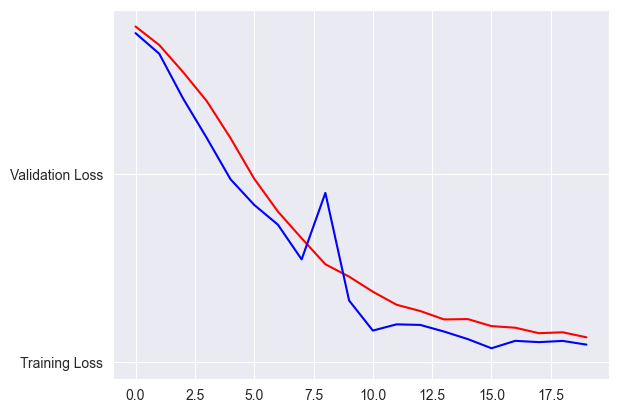

In [114]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [71]:
model.save('virtuka_cnn_aug_v1_95%_sofyan.h5')